<a href="https://colab.research.google.com/github/Mix1996/Project-2-Classification/blob/main/Feature_Engineering_Exercise_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [179]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, \
precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay, \
classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## Data
<br>
In this exercise, you will be working with data about bike share rentals. You can download the data here.

[Here is the source](https://docs.google.com/spreadsheets/d/e/2PACX-1vROUXPkYUkX-2W7JbJ0-oNKaXzpg4NtmU9IeWEY6yFKm32ZEJOpRh_soHD4BeIcuHjYik3SEoXmkgwj/pub?output=csv)

In [180]:
# load data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vROUXPkYUkX-2W7JbJ0-oNKaXzpg4NtmU9IeWEY6yFKm32ZEJOpRh_soHD4BeIcuHjYik3SEoXmkgwj/pub?output=csv')

df_backup = df.copy()

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## Explore and clean the data

In [182]:
# Check for duplicates

df.duplicated().sum()

0

In [183]:
# Remove duplicates

df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

In [184]:
# Check for missing values

df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [185]:
# Check summary statistics

df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [186]:
df.describe(exclude='number')

,datetime
count,10886
unique,10886
top,2011-01-01 0:00:00
freq,1


###Feature Selection
<br>

Which columns will not be useful, or might harm our model?

In [187]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [188]:
df.drop(columns=['casual','registered'], inplace=True)

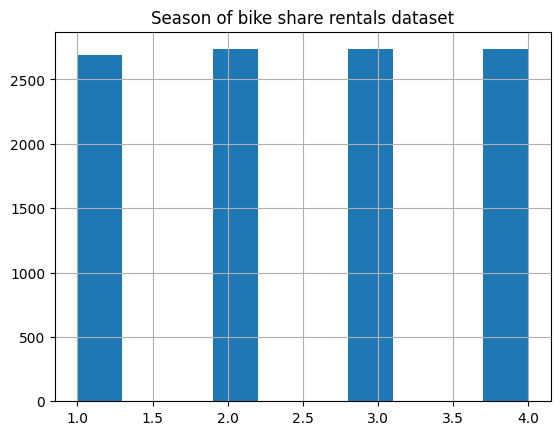

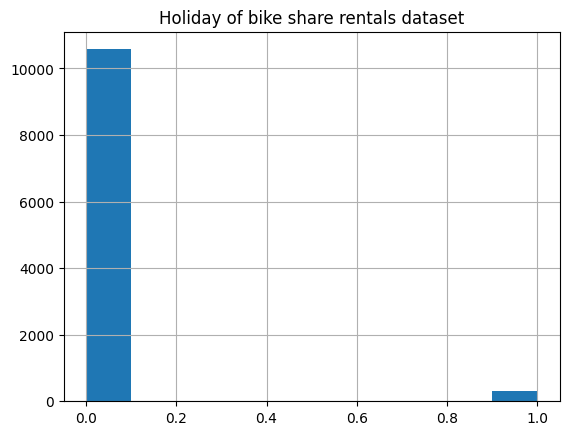

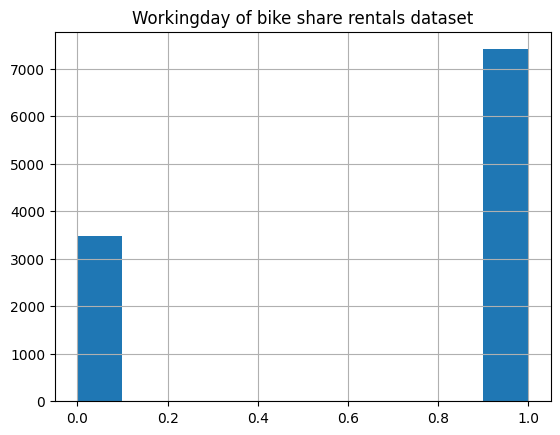

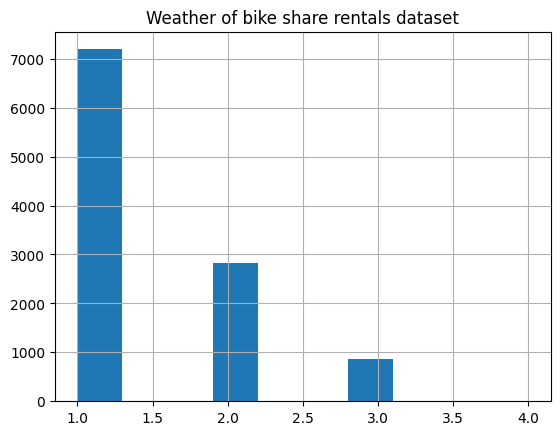

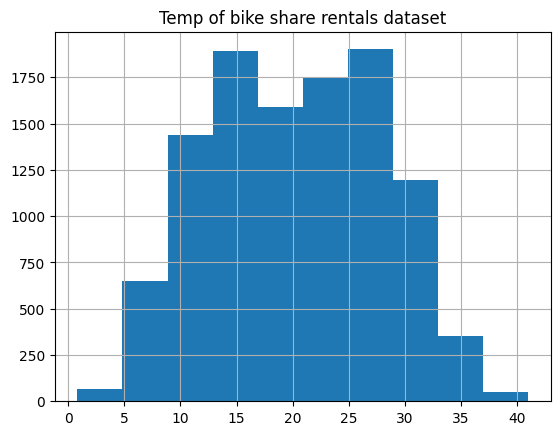

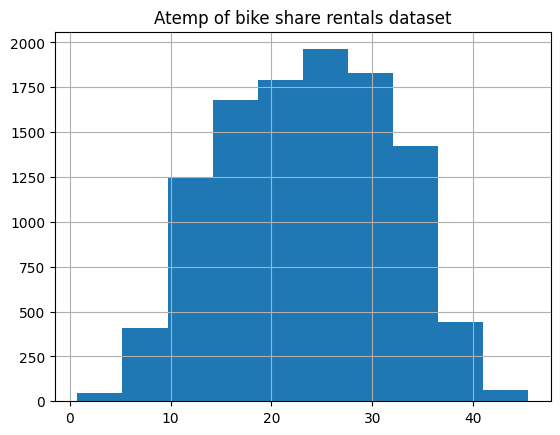

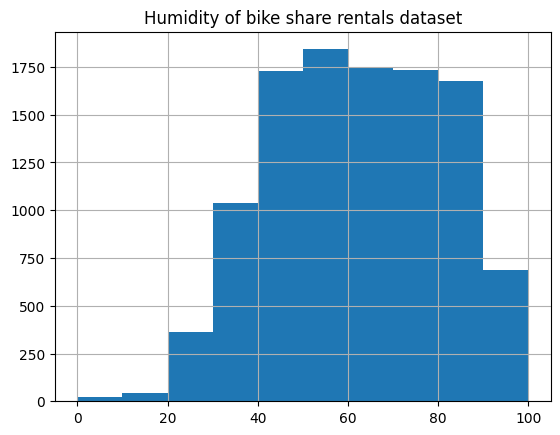

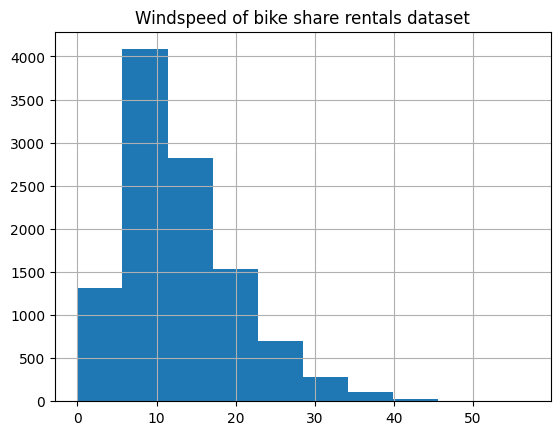

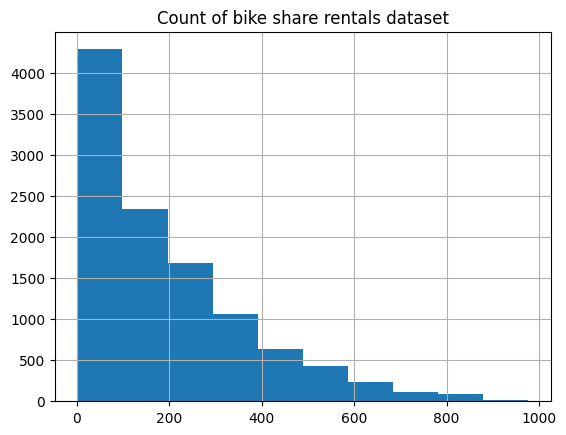

In [189]:
# Explore numeric distributions
for col in df.select_dtypes('number'):
  df[col].hist()
  plt.title(col.capitalize() +' of bike share rentals dataset')

  plt.show()

In [190]:
# Convert 'datetime' column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

In [191]:
# Create new columns for Month, Day of the Week, and Hour of the Day
df['Month'] = df['datetime'].dt.strftime('%B')
df['DayOfWeek'] = df['datetime'].dt.strftime('%A')
df['HourOfDay'] = df['datetime'].dt.hour

In [192]:
# Convert new columns to 'object' datatype
df['Month'] = df['Month'].astype('object')
df['DayOfWeek'] = df['DayOfWeek'].astype('object')
df['HourOfDay'] = df['HourOfDay'].astype('object')

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
 10  Month       10886 non-null  object        
 11  DayOfWeek   10886 non-null  object        
 12  HourOfDay   10886 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(6), object(3)
memory usage: 1.2+ MB


In [194]:
# Drop 'datetime' and 'season' columns
df.drop(['datetime', 'season'], axis=1, inplace=True)

In [195]:
# Convert temperature columns from Celsius to Fahrenheit
df['temp'] = df['temp'].apply(lambda x: x * 9/5 + 32)
df['atemp'] = df['atemp'].apply(lambda x: x * 9/5 + 32)

In [196]:
# Calculate 'temp_variance'
df['temp_variance'] = df['temp'] - df.groupby(['Month', 'DayOfWeek', 'HourOfDay'])['atemp'].transform('mean')

In [197]:
# Drop 'atemp' column
df.drop(['atemp'], axis=1, inplace=True)

In [198]:
df.head()

,holiday,workingday,weather,temp,humidity,windspeed,count,Month,DayOfWeek,HourOfDay,temp_variance
0,0,0,1,49.712,81,0.0,16,January,Saturday,0,-4.9248
1,0,0,1,48.236,80,0.0,40,January,Saturday,1,-5.8536
2,0,0,1,48.236,80,0.0,32,January,Saturday,2,-6.1272
3,0,0,1,49.712,75,0.0,13,January,Saturday,3,-4.1076
4,0,0,1,49.712,75,0.0,1,January,Saturday,4,-3.8340


###Original Features (Before Feature Engineering):

In [199]:
# Split the data into train and test sets
X_original = df.drop(['count'], axis=1)
y_original = df['count']
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42)

# One-hot encode categorical columns for original features
X_train_original = pd.get_dummies(X_train_original, drop_first=True)
X_test_original = pd.get_dummies(X_test_original, drop_first=True)

# Initialize and train the Random Forest Regressor model with original features
rf_model_original = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_original.fit(X_train_original, y_train_original)

# Make predictions on the test set with original features
y_pred_original = rf_model_original.predict(X_test_original)

# Calculate Mean Squared Error (MSE) as a performance metric with original features
mse_original = mean_squared_error(y_test_original, y_pred_original)
print(f"Mean Squared Error (MSE) with Original Features: {mse_original}")


Mean Squared Error (MSE) with Original Features: 5453.613693847235


###Engineered Features (After Feature Engineering):

In [200]:
# Convert temperature columns from Celsius to Fahrenheit
df['temp'] = df['temp'].apply(lambda x: x * 9/5 + 32)

# One-hot encode categorical columns for engineered features
df = pd.get_dummies(df, columns=['Month', 'DayOfWeek', 'HourOfDay'], drop_first=True)

# Split the data into train and test sets
X_engineered = df.drop(['count'], axis=1)
y_engineered = df['count']
X_train_engineered, X_test_engineered, y_train_engineered, y_test_engineered = train_test_split(
    X_engineered, y_engineered, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model with engineered features
rf_model_engineered = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_engineered.fit(X_train_engineered, y_train_engineered)

# Make predictions on the test set with engineered features
y_pred_engineered = rf_model_engineered.predict(X_test_engineered)

# Calculate Mean Squared Error (MSE) as a performance metric with engineered features
mse_engineered = mean_squared_error(y_test_engineered, y_pred_engineered)
print(f"Mean Squared Error (MSE) with Engineered Features: {mse_engineered}")


Mean Squared Error (MSE) with Engineered Features: 5455.6899110801705


###Did these feature engineering choices improve your ability to predict the 'count'?

The Mean Squared Error (MSE) for the model with engineered features is slightly higher (5455.69) compared to the model with the original features (5453.61). However, the difference in MSE between the two models is relatively small, suggesting that the feature engineering choices did not significantly improve the model's ability to predict the 'count' in this case.